In [1]:
import pandas as pd

from GRN_51142 import GRN_51142

grn = GRN_51142()

mydict = {(u,v):d for u,v,d in grn.Gp.edges(data=True)}

mydf = pd.DataFrame(mydict).T

tfs = set(mydf.index.get_level_values(0))

tgs = set(mydf.index.get_level_values(1))

source_function_map = {u:grn.GenCyanoDB.loc[grn.GenCyanoDB.CommonName==u]['Function'].values[0] for u in list(tfs)} 

target_function_map = {u :grn.GenCyanoDB.loc[grn.GenCyanoDB.CommonName==u]['Function'].values[0] for u in list(tgs)}

def func(row):
    s,t = row.name
    return pd.Series({'tffunc':source_function_map[s],'tgfunc':target_function_map[t]})

mydf = mydf.merge(mydf.apply(func,axis=1),right_index=True,left_index=True).reset_index()

In [2]:
mydfedges = mydf.iloc[:,:4]

In [3]:
mydfedges.columns = ['source','target','weight','literature']

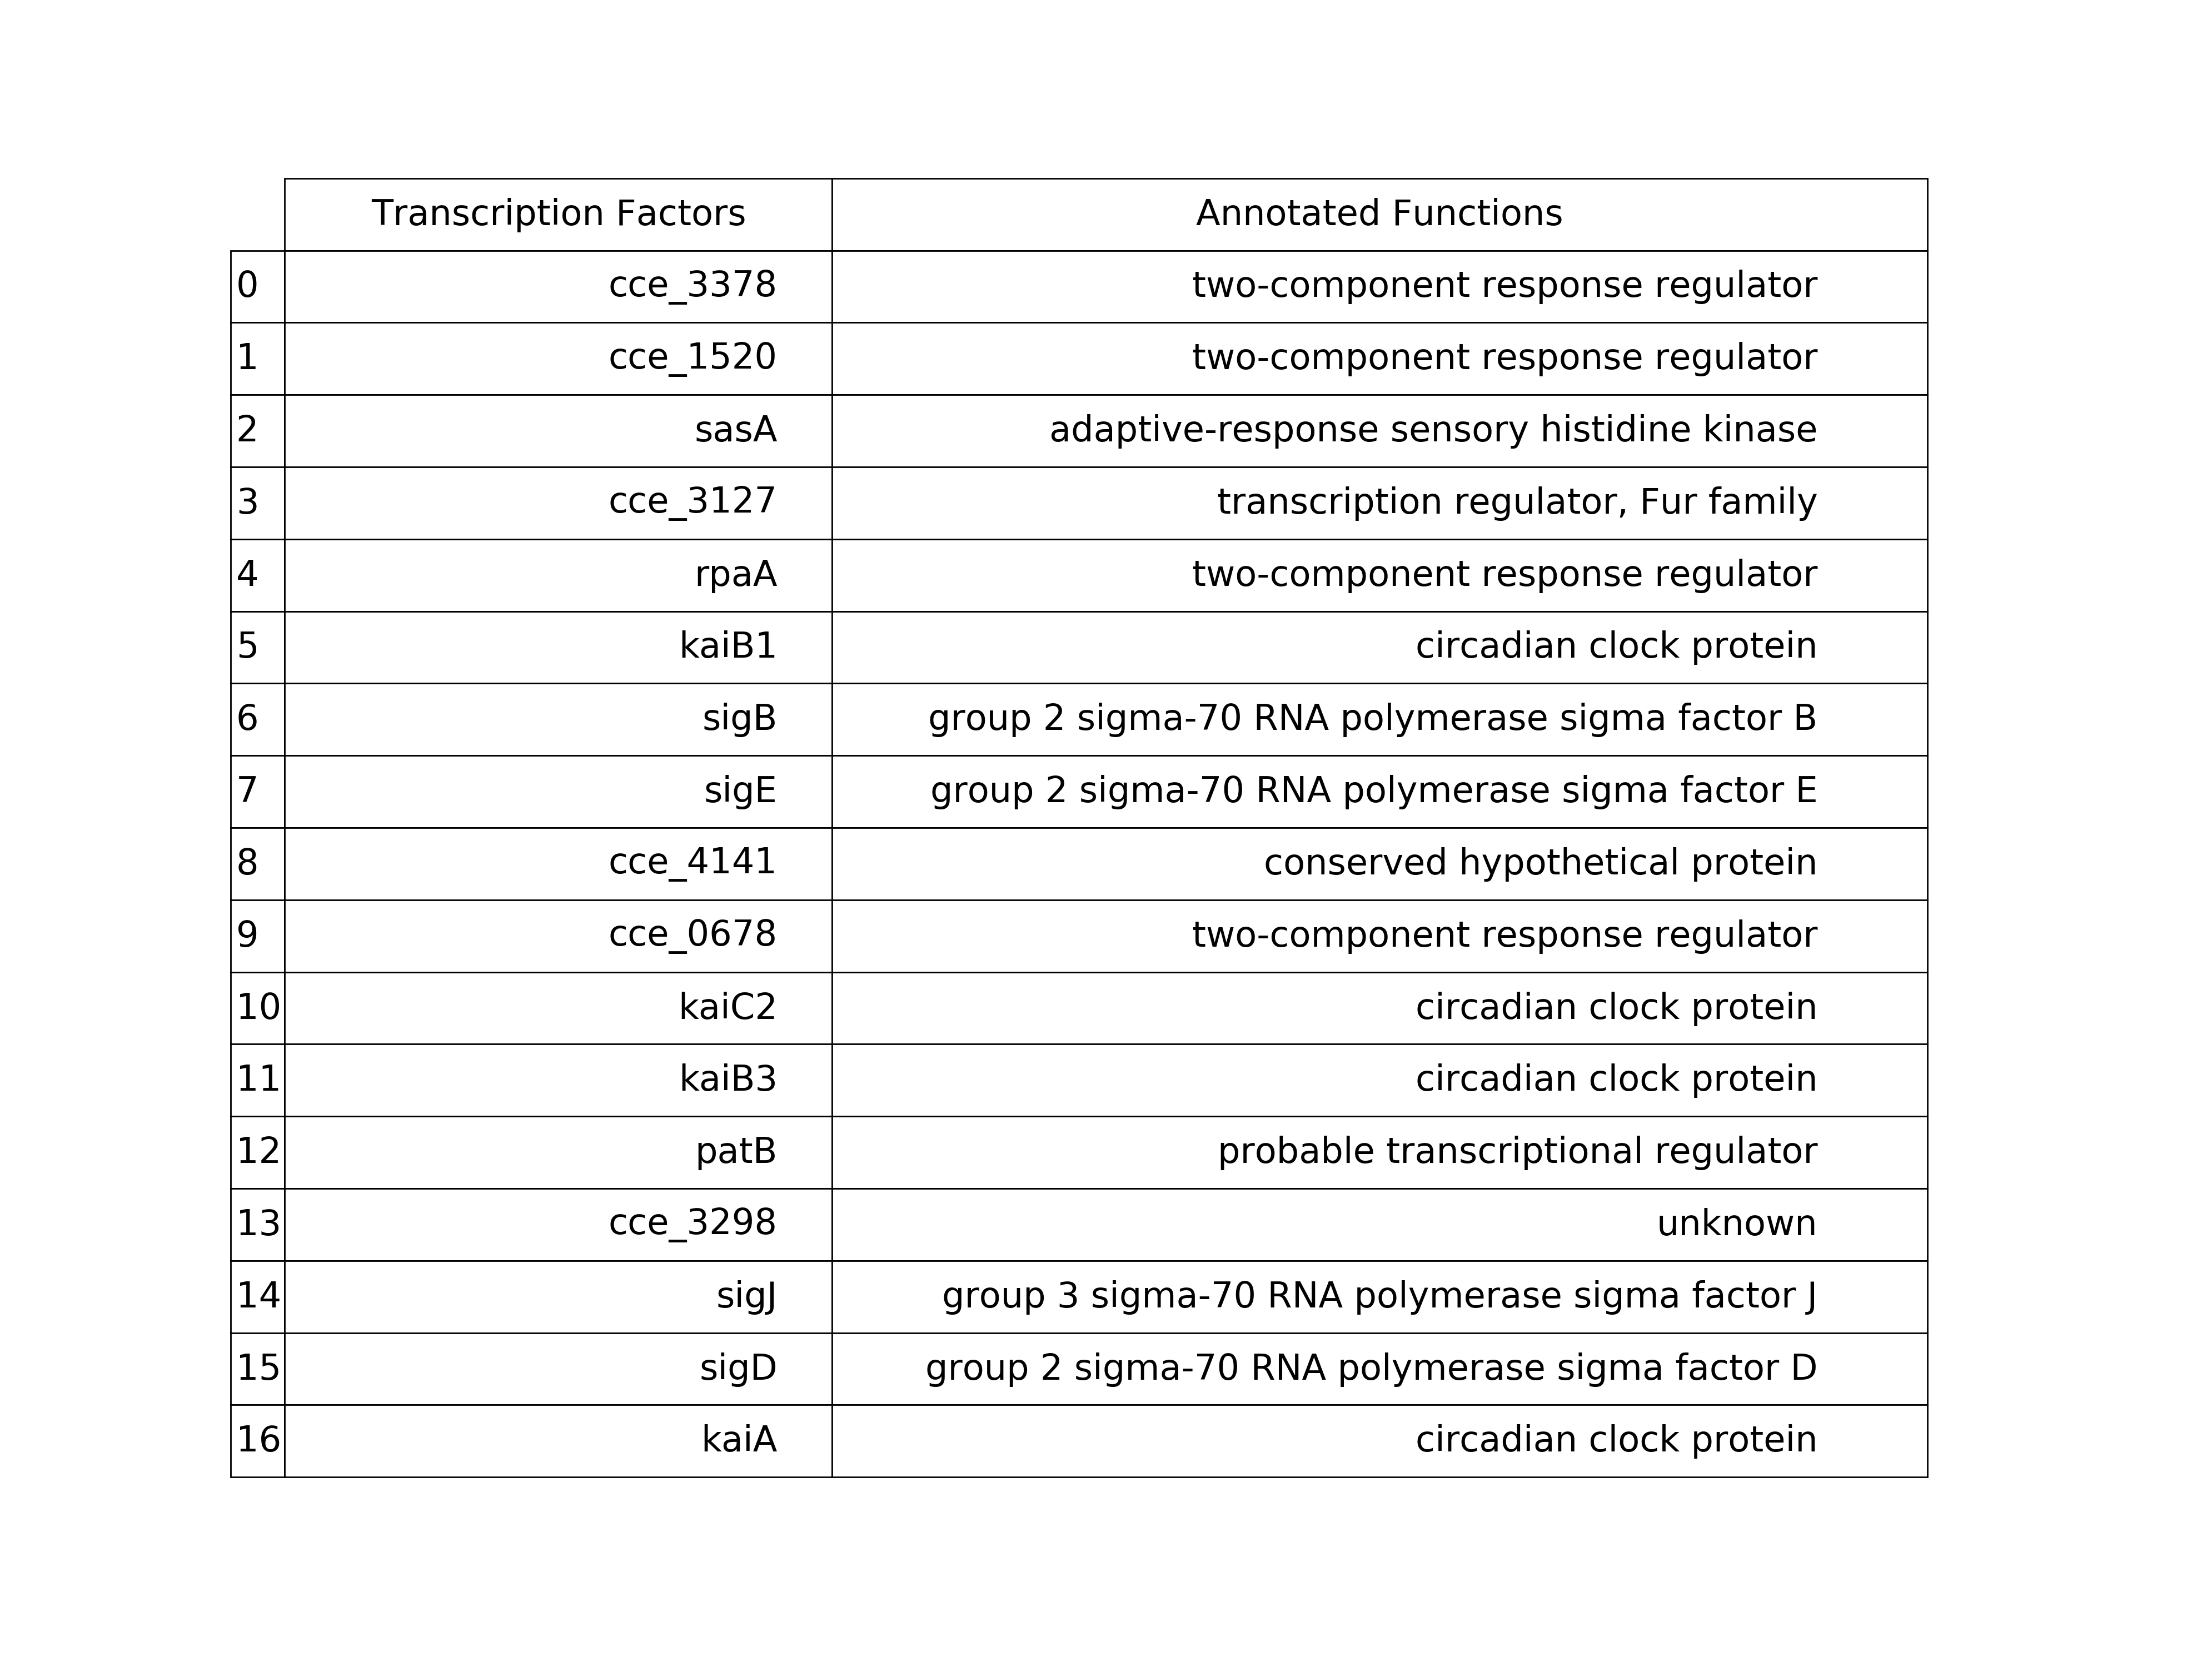

In [4]:
d = {'Transcription Factors': list(source_function_map.keys()),
     'Annotated Functions': list(source_function_map.values()) }

dftfnodes = pd.DataFrame(data=d)

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import table 


fig = plt.figure(figsize = (20,15),dpi=200)
ax = plt.subplot(111,frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.axis('tight')
tab = table(ax, dftfnodes ,loc='center',colWidths=[0.1, 0.2])  # where df is your data frame
tab.set_fontsize(55)
tab.scale(2.5,3)

plt.tight_layout()
plt.savefig('GRNimages/TFs.png',bbox_inches = 'tight')

In [30]:
import docx

In [34]:
dftfnodes.shape[0]

17

In [38]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

#document.add_picture('monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')


In [42]:
doc = docx.Document('Reports/GRN_cyanothece51142.docx')

# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = doc.add_table(dftfnodes.shape[0]+1, dftfnodes.shape[1])

# add the header rows.
for j in range(dftfnodes.shape[-1]):
    t.cell(0,j).text = dftfnodes.columns[j]

# add the rest of the data frame
for i in range(dftfnodes.shape[0]):
    for j in range(dftfnodes.shape[-1]):
        t.cell(i+1,j).text = str(dftfnodes.values[i,j])

# save the doc
doc.save('Reports/GRN_cyanothece51142.docx')

In [26]:
new_target_function_map = {u:grn.GenCyanoDB.loc[grn.GenCyanoDB.CommonName==u]['Function'].values[0]  
                           for u in list(tgs -tfs)}

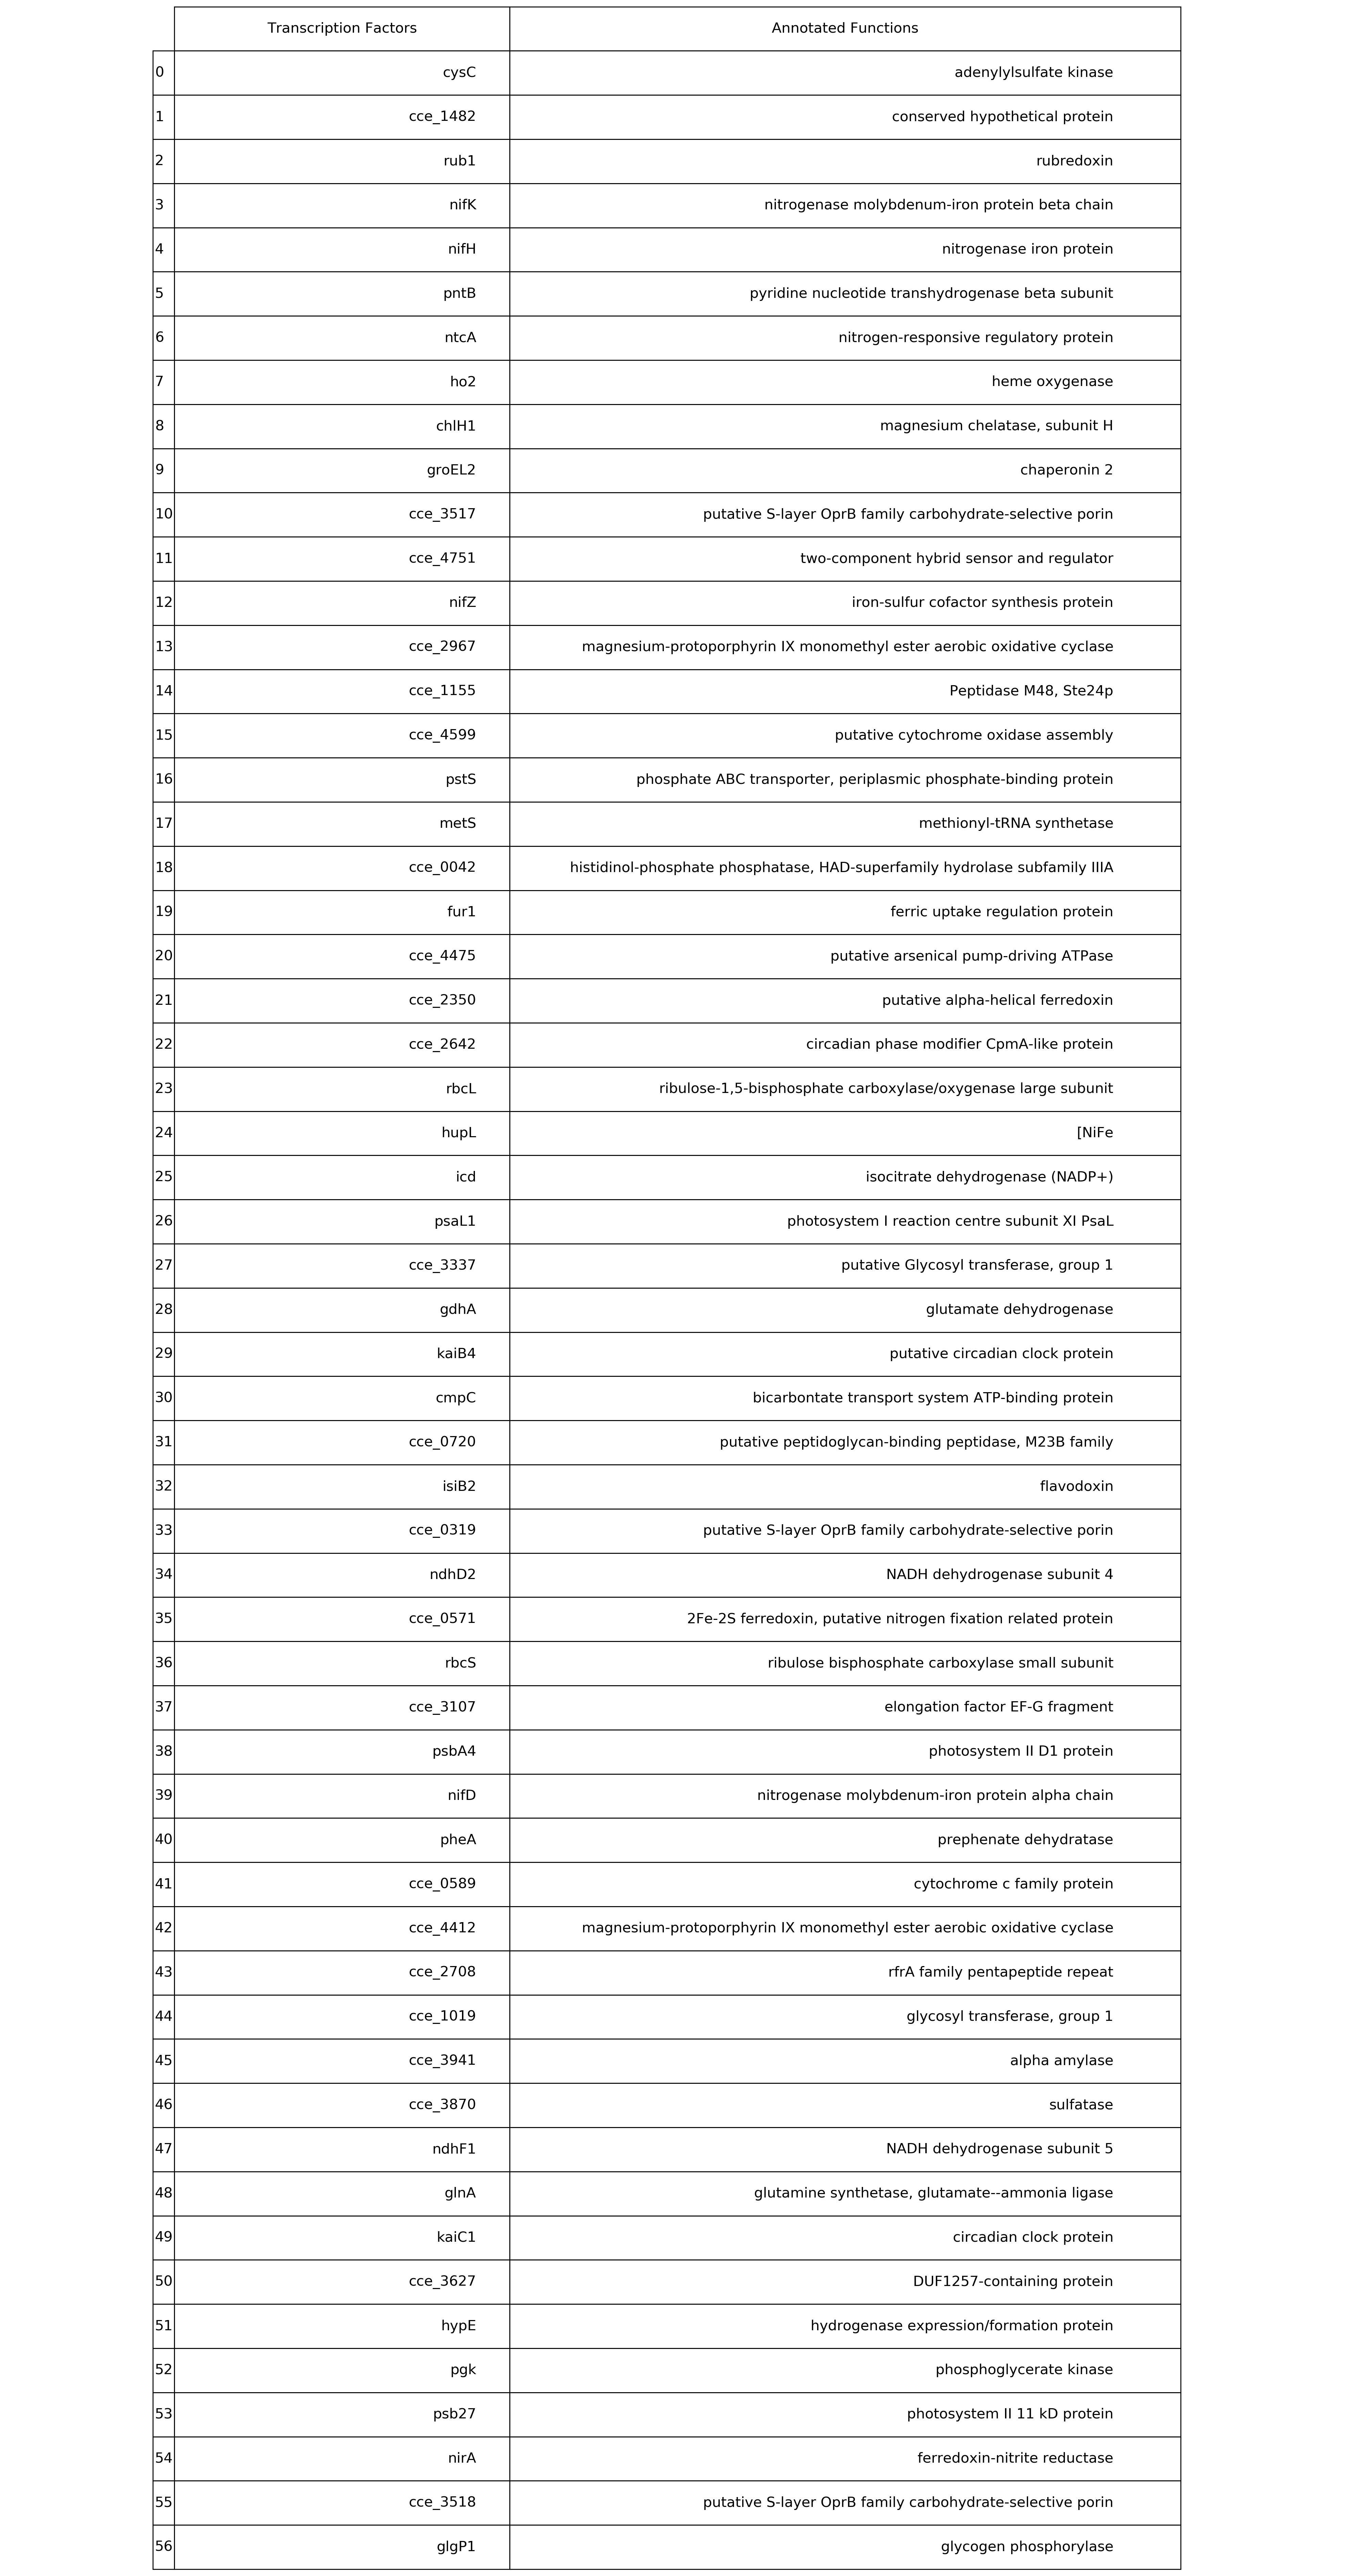

In [29]:
dtg = {'Transcription Factors': list(new_target_function_map.keys()),
     'Annotated Functions': list(new_target_function_map.values()) }

dftgnodes = pd.DataFrame(data=dtg)

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import table 


fig = plt.figure(figsize = (20,15),dpi=200)
ax = plt.subplot(111,frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.axis('tight')
tab = table(ax, dftgnodes ,loc='center',colWidths=[0.1, 0.2])  # where df is your data frame
tab.set_fontsize(55)
tab.scale(2.5,3)

plt.tight_layout()
plt.savefig('GRNimages/TGs.png',bbox_inches = 'tight')

In [43]:
doc = docx.Document('Reports/GRN_cyanothece51142.docx')

# add a table to the end and create a reference variable
# extra row is so we can add the header row
t2 = doc.add_table(dftgnodes.shape[0]+1, dftgnodes.shape[1])

# add the header rows.
for j in range(dftgnodes.shape[-1]):
    t2.cell(0,j).text = dftgnodes.columns[j]

# add the rest of the data frame
for i in range(dftgnodes.shape[0]):
    for j in range(dftgnodes.shape[-1]):
        t2.cell(i+1,j).text = str(dftgnodes.values[i,j])

# save the doc
doc.save('Reports/GRN_cyanothece51142.docx')

In [48]:
mydfedges.columns = ['Transcription Factor','Target Gene', 'Weight', 'Literature Source']

doc = docx.Document('Reports/GRN_cyanothece51142.docx')

# add a table to the end and create a reference variable
# extra row is so we can add the header row
t2 = doc.add_table(mydfedges.shape[0]+1, mydfedges.shape[1])

# add the header rows.
for j in range(mydfedges.shape[-1]):
    t2.cell(0,j).text = mydfedges.columns[j]

# add the rest of the data frame
for i in range(mydfedges.shape[0]):
    for j in range(mydfedges.shape[-1]):
        t2.cell(i+1,j).text = str(mydfedges.values[i,j])

# save the doc
doc.save('Reports/GRN_cyanothece51142.docx')

# Report on the Gene Regulatory Network of Cyanothece sp. 51142

The following image depicts the gene regulatory network of Cyanothece sp.51142 constructed from literature sources. A complete list of the sources along with the algorithms used to infer the edges is provided in a later section of this report. 

## Network and it's description

1. The Transcription Factors are the green pentagons.
2. The Target Genes are the yellow ellipses.
3. A red arrow denotes an activation.
4. A blue arrow denotes an inhibition. 


*provided the network here*
*provided list of nodes and edges along with their functions*


## Information on the nodes and edges of the network

The table below has the following columns:
1. Transcription Factor
2. Target Gene
3. Transcription Factor Annotation
4. Target Gene Annotation
5. Metabolic Pathway Participation
6. Edge Source 

*provide the table here*


## List of the Sources used to construct the Edges and Edge Elucidation

*provide the algorithms used in the 3 marked sources*

## Biological Evidence of the Edge as found in other cyanobacteria

*provide the comments table here*

**may run a BLAST search to identify homologues in other organisms.**

## Important Transcription Factors to look at

**write about the important tfs found in this network which are potential master regulators.**

## Delving into the Network

### Circadian Controlled Network

### Diurnal Controlled Network

### Light Expressed Network

### Dark Expressed Network

### Light to Dark Transition Network

### Dark to Light Transition Network